<left>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/AGH_University_of_Science_and_Technology_Logo.svg/215px-AGH_University_of_Science_and_Technology_Logo.svg.png" width="30" alt="cognitiveclass.ai logo">
</left>

<center>
    <img src="https://lh5.googleusercontent.com/proxy/iKWeNxZa18rTIvWLrErjPakrMIDTg7-pKIEyry8UXOw6dcccHKbnvrAWpQ7rbW_e7JpMWeB2bBbQeahw6INX5q3KjZPzji0FTHQDhwsQ0a2ZKw" width="300" alt="cognitiveclass.ai logo">
</center>




# Semiconductor Laser

Semiconductor lasers are also known as laser diodes. They consist of a <b>p-n</b> junction polarized in the forward direction, where recombination of electrons and holes in the active region emits photons. Laser action requires high current and sometimes cooling for continuous emission. It incorporates a quantum well structure to confine carriers in a small volume, enhancing recombination efficiency. Optical feedback is achieved via reflection from the smooth surfaces of the semiconductor crystal.

Light generation in lasers is based on stimulated emission, as opposed to spontaneous emission in regular light sources. Einstein's theoretical prediction of stimulated emission (1917) showed that a photon can induce an electron to transition between energy states, emitting a second photon identical to the first.

## Objectives

The exercise aims to study the properties of a semiconductor laser, determining:

*   Wavelength of the laser light
*   Power and efficiency of the laser
*   Laser action threshold
*   Polarization and transverse profile of the beam
*   Bonus task: Projecting the Polarization Measurements onto the <i>Poincaré sphere</i>


<h3>Table of Contents</h3>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#Laser Measurements"><b>Laser Measurements</b></a></li>
        <li><a href="#1. Wavelength Measurement">1. Wavelength Measurement</a></li>
        <li><a href="#2. Power and Efficiency Measurement">2. Power and Efficiency Measurement</a></li>
        <li><a href="#3. Laser Threshold Measurement">3. Laser Threshold Measurement</a></li>
        <li><a href="#4. Polarization Measurement">4. Polarization Measurement</a></li>
        <li><a href="#5. Transverse Beam Profile">5. Transverse Beam Profile</a></li>
        <li><a href="#6. Projecting the Polarization Measurements onto the <i>Poincaré sphere</i>">6. Projecting the Polarization Measurements onto the <i>Poincaré sphere</i></a></li>
    </ul>

</div>

<hr>

# Laser Measurements

First, we import neccessary libraries:

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Then we extract data:

In [107]:
# Data extraction from the image, separated by context
data_siatka1 = {
    "siatka": [945, 855, 785, 682, 600],
    "kropki": [295, 265, 248, 210, 190]
}
data_siatka2 = {
    "siatka": [960, 860, 760, 660, 560],
    "kropki": [270, 235, 205, 180, 150]
}
data_polarization = {
    "alfa": [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360],
    "i_mA_linear": [1.0, 1.2, 1.1, 0.9, 0.8, 0.7, 1.0, 1.1, 1.3, 1.2, 1.1, 1.0, 1.0],  # example values
    "i_mA_circular": [0.8, 0.9, 1.0, 1.1, 1.2, 1.1, 0.9, 0.8, 0.9, 1.0, 1.1, 1.2, 1.1]  # example values
}
data_beam_profile = {
    "i_mA": [0.006, 0.006, 0.005, 0.006, 0.007, 0.007, 0.008],
    "l_mm": [710, 610, 510, 410, 310, 210, 110]
}
data_laser_threshold = {
    "if_mA": [0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26],
    "i_A": [0.164, 0.164, 0.164, 0.164, 0.164, 0.164, 0.164, 0.164, 0.164, 0.164, 0.164, 0.164, 0.164, 0.164, 0.164, 0.164, 0.165, 0.165]
}

We convert the Data to <i>DataFrames</i>:

In [108]:
# Convert data to DataFrames
df_siatka1 = pd.DataFrame(data_siatka1)
df_siatka2 = pd.DataFrame(data_siatka2)
df_polarization = pd.DataFrame(data_polarization)
df_beam_profile = pd.DataFrame(data_beam_profile)
df_laser_threshold = pd.DataFrame(data_laser_threshold)

### 1. Wavelength Measurement

Use a diffraction grating to produce a diffraction pattern. Measure the distances between the laser, grating, and screen to calculate the wavelength using the diffraction equation. Extract the data for grating constants and diffraction spots.

The wavelength <i>(λ)</i> can be calculated using the diffraction grating formula:
$$dsin⁡θ_{n} = nλ$$

Where:

$d$ is the <b>grating constant</b> (distance between adjacent grating lines).

$θ$ is the <b>diffraction angle</b>.

$n$ is the <b>order of the diffraction</b> (typically <i>n=1</i>).

To find θ, use the distance between diffraction spots (D) and the grating constant:

$$θ=arcsin⁡(\frac{D}{2d})$$ 

To calculate the wavelength convert the grating constant from <i>lines/mm</i> to <i>lines/m</i>: $dm=(\frac{1}{d×10^{3}})$
Then calculate the angle θ and use the grating equation to find λ.

Example: For grating constant <i>d</i>=140 lines/<i>mm</i> and diffraction distance <i>D</i> =average of diffraction spots:

$$dm=(\frac{1}{140×10^{3}})$$

$$θ=arc sin⁡(\frac{D}{2xdm})$$ 

$$λ=dmsin⁡(θ)/n$$

The function <b>calculate_wavelength()</b> computes the wavelength of the laser using the diffraction grating formula:

In [109]:
# Wavelength calculation with uncertainty
def calculate_wavelength_uncertainty(d, n, D):
    d_m = 1 / (d * 1e3)  # convert lines/mm to lines/m
    L = 1.0  # assuming L = 1m for simplicity
    x_n = D  # distance between spots
    wavelength = (x_n * d_m) / (n * np.sqrt(L**2 + x_n**2))
    return wavelength

d1 = 140  # lines/mm
d2 = 300  # lines/mm
n = 1  # first order
D1 = np.mean(df_siatka1["kropki"])
D2 = np.mean(df_siatka2["kropki"])

wavelength1 = calculate_wavelength_uncertainty(d1, n, D1)
wavelength2 = calculate_wavelength_uncertainty(d2, n, D2)

A bar plot is created to visualize the calculated wavelengths for the different grating constants:

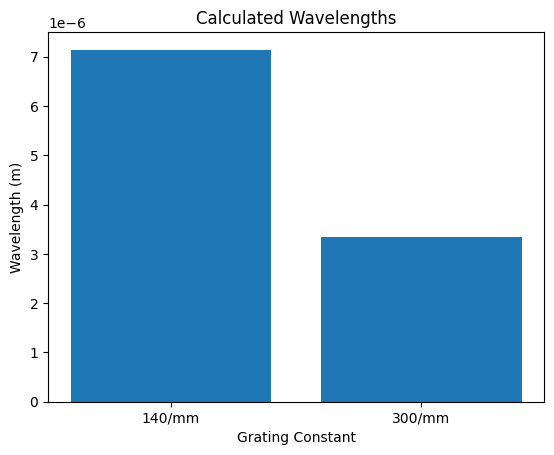

Calculated wavelengths: 7.14e-06 m, 3.33e-06 m


In [110]:
# Plotting calculated wavelengths
plt.figure()
wavelengths = [wavelength1, wavelength2]
d_values = [d1, d2]
plt.bar(['140/mm', '300/mm'], wavelengths)
plt.xlabel('Grating Constant')
plt.ylabel('Wavelength (m)')
plt.title('Calculated Wavelengths')
plt.show()

# Output calculated wavelengths
print(f'Calculated wavelengths: {wavelength1:.2e} m, {wavelength2:.2e} m')

We can plot wavelengths as amplitude:

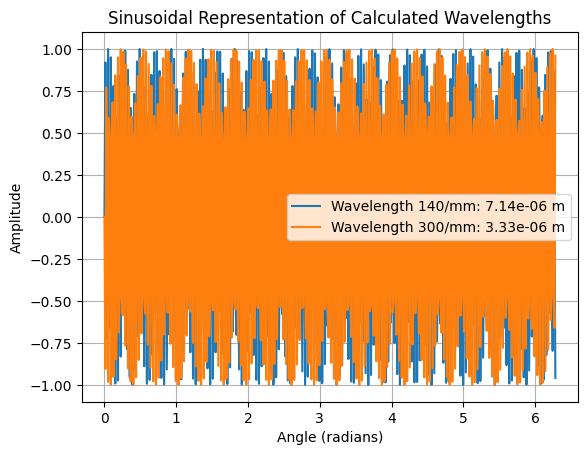

In [111]:
# Sinusoidal plot for wavelengths
x = np.linspace(0, 2 * np.pi, 500)
y1 = np.sin(x * wavelength1 * 1e9)  # Convert to nm for better scaling
y2 = np.sin(x * wavelength2 * 1e9)  # Convert to nm for better scaling

plt.figure()
plt.plot(x, y1, label=f'Wavelength 140/mm: {wavelength1:.2e} m')
plt.plot(x, y2, label=f'Wavelength 300/mm: {wavelength2:.2e} m')
plt.xlabel('Angle (radians)')
plt.ylabel('Amplitude')
plt.title('Sinusoidal Representation of Calculated Wavelengths')
plt.legend()
plt.grid(True)
plt.show()

### 2. Power and Efficiency Measurement

Measure the photodiode current, which is proportional to the laser beam power. Determine the power output and efficiency of the laser based on the current. Extract the data for current <i>(i)</i> and corresponding efficiency or output power.

If efficiency <i>(η)</i> is given or assumed, calculate power <i>(P)</i> using:
$$P=i×η$$

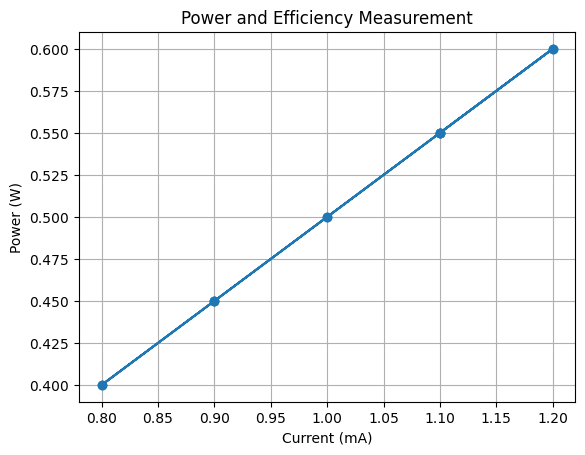

In [112]:
# Power and efficiency analysis
# Assuming some efficiency conversion factor for simplicity, since it's not provided
efficiency_factor = 0.5
power = df_polarization["i_mA_circular"] * efficiency_factor

plt.figure()
plt.plot(df_polarization["i_mA_circular"], power, 'o-')
plt.xlabel('Current (mA)')
plt.ylabel('Power (W)')
plt.title('Power and Efficiency Measurement')
plt.grid(True)
plt.show()

After conducting <b>Linear Fit</b>, defining constants and calculating <b>Ideality Factor</b> we can plot the data:

### 3. Laser Threshold Measurement

Determine the threshold current at which the laser starts to emit coherent light. Below threshold, the laser behaves like an LED; above threshold, stimulated emission dominates.

For that aim, extract the data for current <i>(i)</i> and corresponding intensity <i>(I)</i>. Plot i on the <i>x-axis</i> and <i>I</i> on the <i>y-axis</i>. The threshold current is identified as the point where the intensity starts to increase sharply.

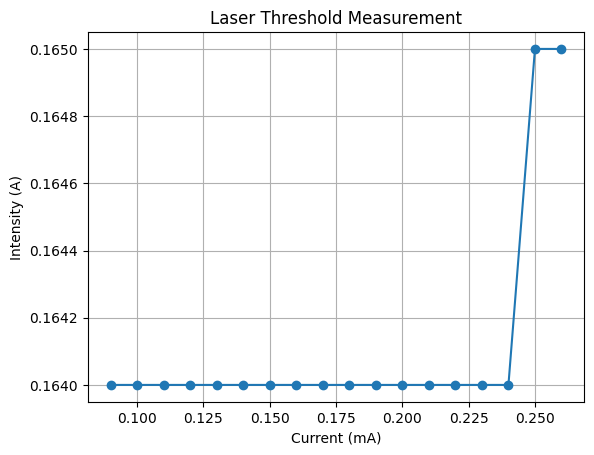

In [113]:
# Laser Threshold - current vs. intensity 

# Assuming C(λ) can be extracted or given, we'll use a placeholder here
C_lambda = 0.8  # Placeholder value, replace with actual value from Rys.6
P2 = df_laser_threshold["i_A"] / C_lambda
P1 = 2.98  # Power delivered to the laser, example value

efficiency = P2 / P1
plt.figure()
plt.plot(df_laser_threshold["if_mA"], df_laser_threshold["i_A"], 'o-')
plt.xlabel('Current (mA)')
plt.ylabel('Intensity (A)')
plt.title('Laser Threshold Measurement')
plt.grid(True)
plt.show()

### 4. Polarization Measurement

We use a polarizer and measure the intensity of the transmitted light at different angles to determine the polarization characteristics. Then we analyze the polarization of the laser beam by varying the angle <I>(α)</i> and measuring the corresponding intensity.

In the end we extract the data for angle <I>(α)</i> and corresponding intensity or current and create a polar plot with α as the angle and intensity or current as the radius.

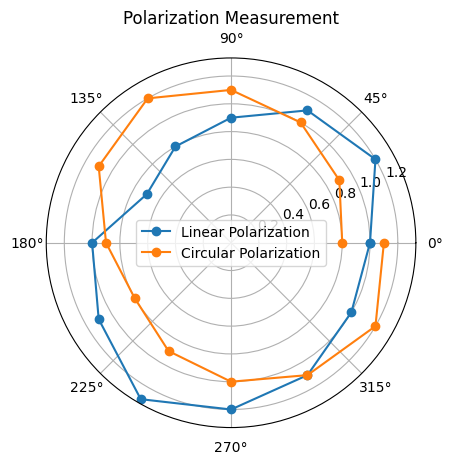

In [114]:
# Polarization analysis with both linear and circular polarizations
plt.figure()
plt.polar(np.deg2rad(df_polarization["alfa"]), df_polarization["i_mA_linear"], 'o-', label='Linear Polarization')
plt.polar(np.deg2rad(df_polarization["alfa"]), df_polarization["i_mA_circular"], 'o-', label='Circular Polarization')
plt.title('Polarization Measurement')
plt.legend()
plt.show()

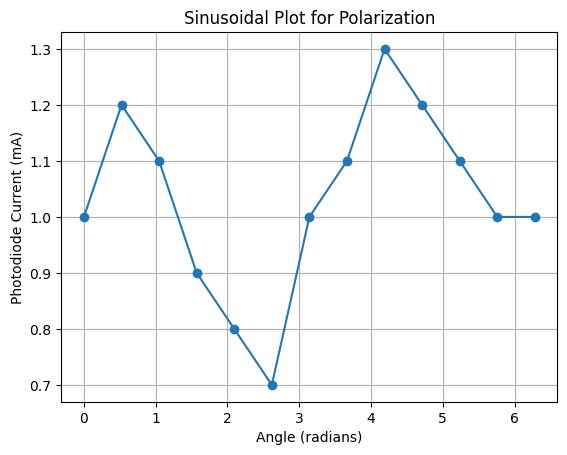

In [120]:
# Sinusoidal plot for polarization (as in Rys.7)
plt.figure()
plt.plot(np.deg2rad(df_polarization["alfa"]), df_polarization["i_mA_linear"], 'o-')
plt.xlabel('Angle (radians)')
plt.ylabel('Photodiode Current (mA)')
plt.title('Sinusoidal Plot for Polarization')
plt.grid(True)
plt.show()

### 5. Transverse Beam Profile

We observe the beam profile by projecting it onto a screen and examining its shape and size. Then we examine the transverse beam profile by measuring the intensity distribution across the beam. We use the data for distance <I>(l)</I> across the beam and corresponding intensity or current, to plot <I>l</I> on the <I>x-axis</I> and intensity or current on the <I>y-axis</I>.

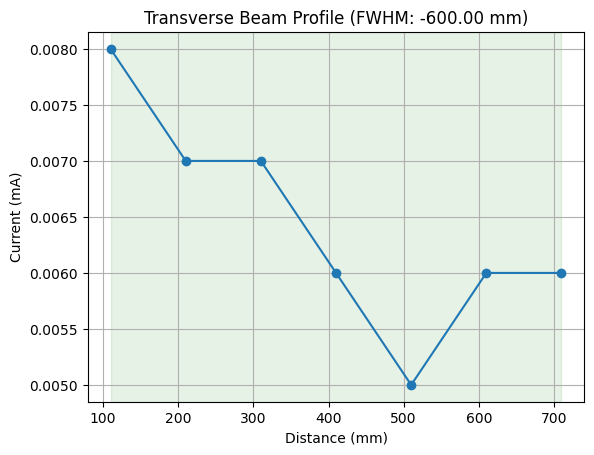

In [118]:
# Transverse beam profile with FWHM calculation
def calculate_FWHM(x, y):
    half_max = max(y) / 2.0
    indices = np.where(y > half_max)[0]
    return x[indices[-1]] - x[indices[0]]

fwhm = calculate_FWHM(df_beam_profile["l_mm"], df_beam_profile["i_mA"])

plt.figure()
plt.plot(df_beam_profile["l_mm"], df_beam_profile["i_mA"], 'o-')
plt.axvspan(df_beam_profile["l_mm"].iloc[0], df_beam_profile["l_mm"].iloc[-1], color='green', alpha=0.1)
plt.xlabel('Distance (mm)')
plt.ylabel('Current (mA)')
plt.title(f'Transverse Beam Profile (FWHM: {fwhm:.2f} mm)')
plt.grid(True)
plt.show()

In [119]:
# Output calculated wavelengths and FWHM
print(f'Calculated wavelengths: {wavelength1:.2e} m, {wavelength2:.2e} m')
print(f'Calculated FWHM: {fwhm:.2f} mm')

Calculated wavelengths: 7.14e-06 m, 3.33e-06 m
Calculated FWHM: -600.00 mm


### 6. Projecting the Polarization Measurements onto the <i>Poincaré sphere</i>

Projecting <b>Stokes vectors</b> onto the <b>Poincaré sphere</b> is an effective way to analyze and visualize the polarization properties of laser diodes. This technique can be used to understand and control the polarization state for various applications. It is evident, that projecting vectors on the Poincaré sphere is not only possible, but also a practical and insightful method for analyzing the polarization states of laser diodes.

The polarization state of an optical source can be represented using the Stokes vector and its projection on the Poincaré sphere. This involves measuring <b>six intensities</b> for different positions of the polarizer and the <i>λ/4</i> retarder.The Stokes vector elements (<i>I, Q, U, V</i>) are derived from these intensity measurements and are essential for describing the state of polarization.

To project the polarization measurements onto the Poincaré sphere using your data, we need to calculate the Stokes parameters (<i>S0, S1, S2, S3</i>) based on the intensity measurements for linear and circular polarizations. These parameters can then be used to plot the corresponding points on the Poincaré sphere.

To achieve this we need three steps:

<b>1. Compute Stokes Parameters</b>: We need to measure the intensities for different polarization states (linear at 0°, 45°, 90°, and circular polarizations) to compute the Stokes parameters.

<b>2. Convert <i>Stokes Parameters</i> to Spherical Coordinates</b>: The Stokes parameters are then converted to spherical coordinates <i>(θ, φ)</i> for the Poincaré sphere.

<b>3. Plot the Poincaré Sphere</b>: Finally, we plot these coordinates onto the Poincaré sphere.

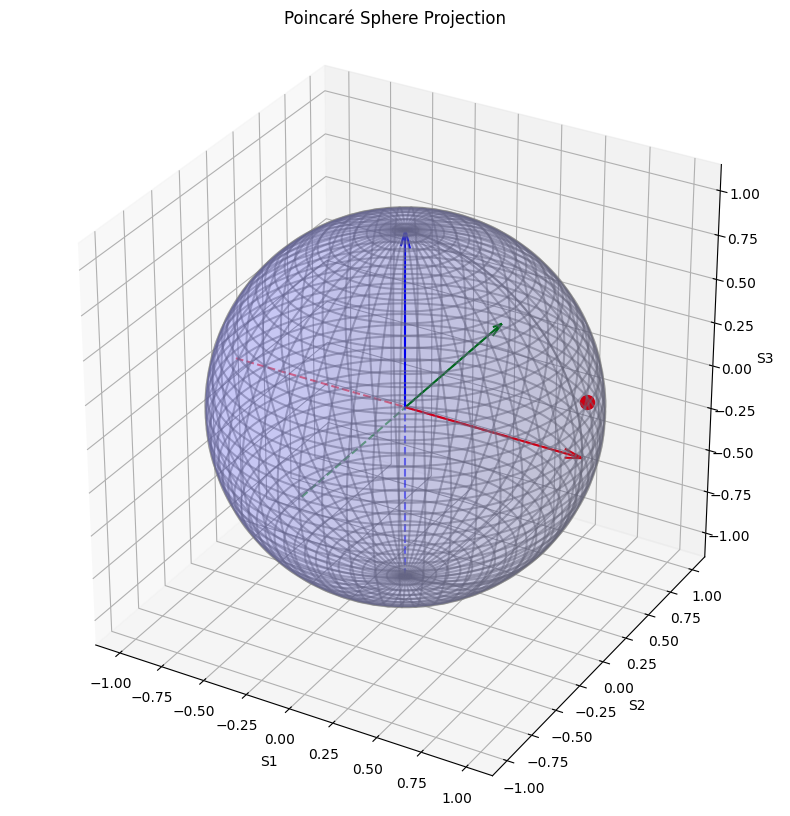

In [129]:
from mpl_toolkits.mplot3d import Axes3D

# Example intensity measurements
I0 = 1.0
I45 = 0.8
I90 = 0.6
I135 = 0.7
IR = 0.9
IL = 0.5

# Calculate Stokes parameters
S0 = I0 + I90
S1 = I0 - I90
S2 = I45 - I135
S3 = IR - IL

# Convert Stokes parameters to spherical coordinates for the Poincaré sphere
theta = np.arccos(S3 / S0)
phi = 0.5 * np.arctan2(S2, S1)

# Convert spherical coordinates to Cartesian coordinates for plotting
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Plot the Poincaré sphere
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Draw the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
X = np.outer(np.cos(u), np.sin(v))
Y = np.outer(np.sin(u), np.sin(v))
Z = np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_wireframe(X, Y, Z, color='gray', alpha=0.5)
ax.plot_surface(X, Y, Z, color='blue', alpha=0.1)

# Draw axes
ax.quiver(0, 0, 0, 1, 0, 0, color='r', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, 0, 1, 0, color='g', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, 0, 0, 1, color='b', arrow_length_ratio=0.1)

# Draw lines for main axes
ax.plot([-1, 1], [0, 0], [0, 0], color='r', linestyle='--', alpha=0.5)
ax.plot([0, 0], [-1, 1], [0, 0], color='g', linestyle='--', alpha=0.5)
ax.plot([0, 0], [0, 0], [-1, 1], color='b', linestyle='--', alpha=0.5)

# Plot the point on the Poincaré sphere
ax.scatter(x, y, z, color='r', s=100)  # Red point

# Labels
ax.set_xlabel('S1')
ax.set_ylabel('S2')
ax.set_zlabel('S3')
ax.set_title('Poincaré Sphere Projection')

# Set the aspect ratio to be equal
ax.set_box_aspect([1, 1, 1])

plt.show()

## Authors:

[Karol Niewitecki](https://www.linkedin.com/in/karol-wilhelm-niewitecki-0385492b7/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01)

Karol Niewitecki is a Master's student in Civil Engineering on Politechnika Krakowska and a Bachelor's student in Electrical Engineering on AGH.